In [1]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from metrics_toolbox import EvaluatorBuilder
import numpy as np

# 1. Binary classification

{'roc_auc_1_mean': 0.9742025105975314,
 'roc_auc_1_std': 0.006250164299587968,
 'accuracy_mean': 0.953583708013753,
 'accuracy_std': 0.006215286961121447,
 'precision_1_latest': np.float64(0.9604743083003953),
 'recall_1_latest': np.float64(0.9759036144578314),
 'f1_score_1_mean': 0.9631335124617808,
 'f1_score_1_minmax': 0.009987955156119721}

{'roc_auc_1_steps': [0.9804526748971193, 0.9679523462979434],
 'accuracy_steps': [0.9473684210526315, 0.9597989949748744],
 'precision_1_steps': [np.float64(0.9626168224299065),
  np.float64(0.9604743083003953)],
 'recall_1_steps': [np.float64(0.9537037037037037),
  np.float64(0.9759036144578314)],
 'f1_score_1_steps': [np.float64(0.958139534883721),
  np.float64(0.9681274900398407)]}

{'roc_auc_curves': <Figure size 600x480 with 1 Axes>,
 'confusion_matrices': <Figure size 1200x480 with 4 Axes>}

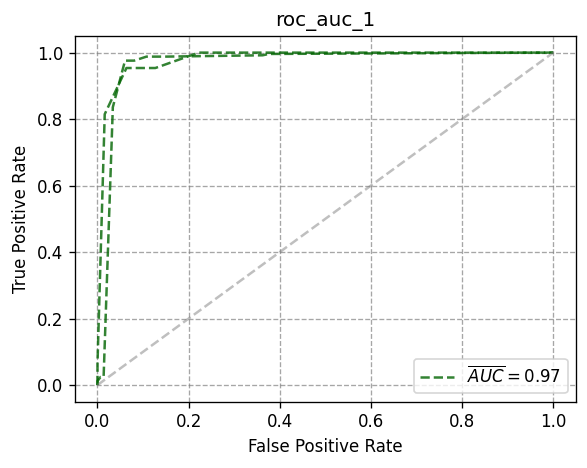

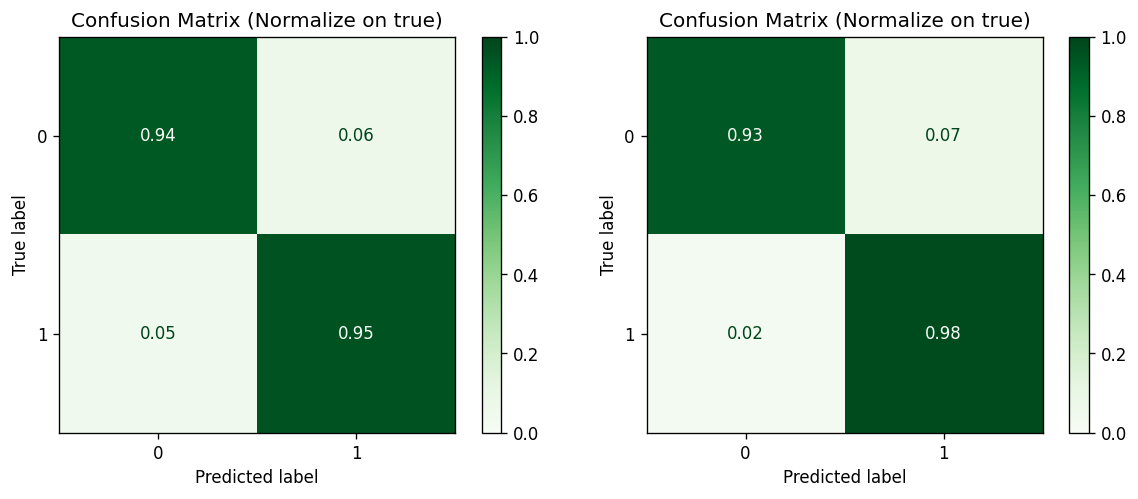

In [2]:
# 1. Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train a model
model = RandomForestClassifier(n_estimators=2, random_state=42, max_depth=3)
model.fit(X_train, y_train)

# 3. Build evaluator with multiple metrics, you can mix and match classification and probabilistic metrics
evaluator = (
    EvaluatorBuilder()
    .add_metric("roc_auc_target", target_name=1, reducers=["mean", "std"])
    .add_metric("accuracy", reducers=["mean", "std"])
    .add_metric("precision_target", target_name=1)
    .add_metric("recall_target", target_name=1)
    .add_metric("f1_score_target", target_name=1, reducers=["mean", "minmax"])
).build()

# 4. Evaluate model directly
evaluator.add_model_evaluation(model, X_test, y_test)

# 5. Add another evaluation on training set for comparison
evaluator.add_model_evaluation(model, X_train, y_train)

# 6. Get results
result = evaluator.get_results()
display(result['values'])
display(result['steps'])
display(result['figures'])

# 7. View figures
display(result['figures']['roc_auc_curves'])
display(result['figures']['confusion_matrices'])